# Etivity 3: John O'Reilly<br/>
22254773

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset<br/>
I have removed the target feature, 'Loan_Status_Y'

In [3]:
df = pd.read_csv("./loans_train_prepared.csv")
# separate target variable
y = df['Loan_Status_Y']
X = df.drop(['Loan_Status_Y'], axis=1)
data = np.array(X.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)
# Find and print the max and min values for each column to check scaling
# max_values = df.max()
# min_values = df.min()
# print("Max values:")
# print(max_values)
# print("\nMin values:")
# print(min_values)
# Find and print the max and min values for overall array
print("Max values:")
print(np.max(data))
print("\nMin values:")
print(np.min(data))



(number of examples, number of attributes):  (614, 15)
Max values:
3.357479763

Min values:
0.0


### B. Rescale the Data
Rescaling is not required as the dataset is already scaled. I tried scaling to see if there was any improvement but no.

In [21]:
# using this standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
# # Find and print the max and min values for each column to check scaling
# max_values = np.max(data)
# min_values = np.min(data)
# print("Max values:")
# print(np.max(data))
# print("\nMin values:")
# print(np.min(data))

Max values:
3.357479763

Min values:
0.0


### C. Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [20]:
colors = np.array(['orange', 'blue', 'lime', 'lightblue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

Find the best value for k using two methods 
 1. Elbow Method; plots the within-cluster sum of squared distances for different k values. Optimum is indicated where the k value starts to decrease at a slower rate. This "elbow" point represents the optimal number of clusters.

In [63]:
# just guess
k = 3


In [4]:
# Getting warnings about memory leak in Kmeans, dowloaded latest version but not fixed
# so just going to supress the warning
import warnings
warnings.filterwarnings("ignore")

Optimal number of clusters (k): 9


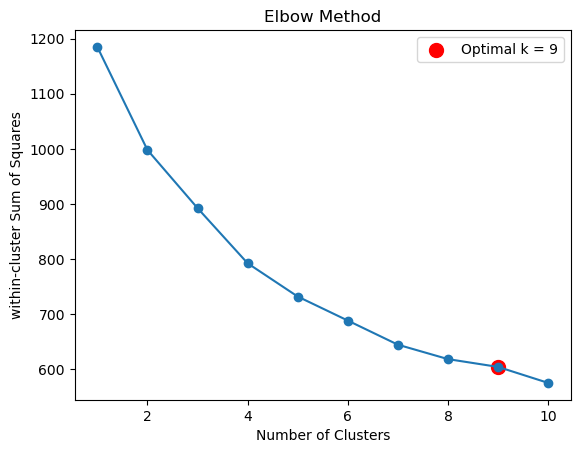

In [14]:
from sklearn.cluster import KMeans
# Calculate the within-cluster sum of squared distances (inertia) for different k values
arr_inertias=[]
max_clusters=10
for k in range(1,max_clusters + 1):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(data)
    arr_inertias.append(kmeans.inertia_)
# Use the elbow method to find the optimal k value
# Calculate the difference in inertia and find the index with the greatest 
diff_inertia = np.diff(arr_inertias)
optimal_k = np.argmax(diff_inertia)+2
# show optimum k on plot as red circle
circle_x = optimal_k
circle_y = arr_inertias[optimal_k - 1]
print("Optimal number of clusters (k):", optimal_k)
# Plot to show the elbow point
plt.plot(range(1, max_clusters + 1),arr_inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster Sum of Squares')
plt.title('Elbow Method')
# plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(circle_x, circle_y, c='r', marker='o', s=100, label=f'Optimal k = {optimal_k}')
plt.legend()

Looking at the plot the elbow point is not immediately obvious

2. Silhouette method<br/> Evaluates the similarity of points within each cluster and the dissimilarity of points between different clusters. Here I run the silhouette method for different values of k from 2 to 11 in a loop.<br/>
Getting similar or the same result for both methods when constrained to at most k= 10.

Optimum k: 9


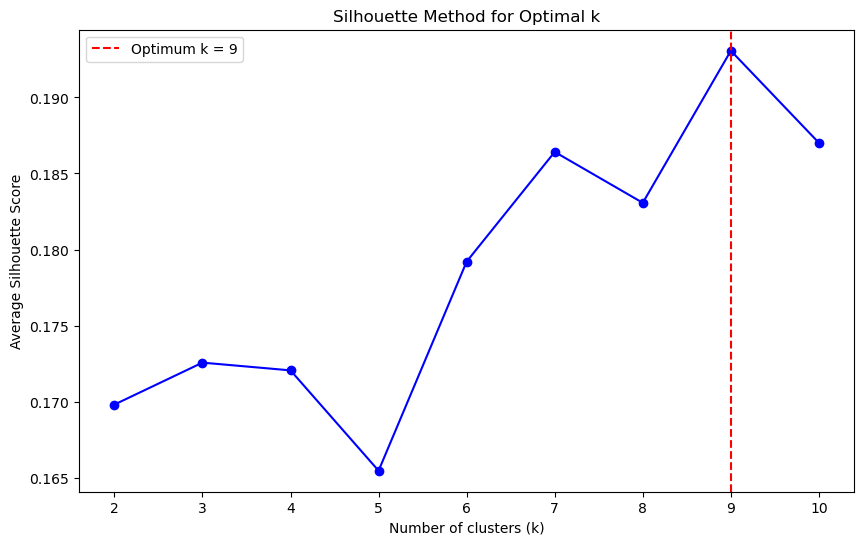

In [12]:
from sklearn.metrics import silhouette_score
K=range(2,11)
n_init=10  # Number of times to run k-means 
avg_silhouette_scores=[]
for k in K:
    arr_scores=[]
    for i in range(n_init):
        kmeans=KMeans(n_clusters=k,init='random')
        kmeans.fit(data)
        cluster_labels=kmeans.labels_
        arr_scores.append(silhouette_score(data, cluster_labels))
    avg_silhouette_scores.append(np.mean(arr_scores))
# Identify the optimum k value
opt_k = K[np.argmax(avg_silhouette_scores)]
print("Optimum k:", opt_k)
# Plot silhouette scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(K, avg_silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.axvline(x=opt_k, color='r', linestyle='--', label=f'Optimum k = {opt_k}')
plt.legend()
plt.show()

I have limited the maximum number of clusters to 10, any more than this is too hard to interpret I think.

#### Run k-Means

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

In [60]:
k=9
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

Append the cluster centers to the dataset.

In [51]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [52]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

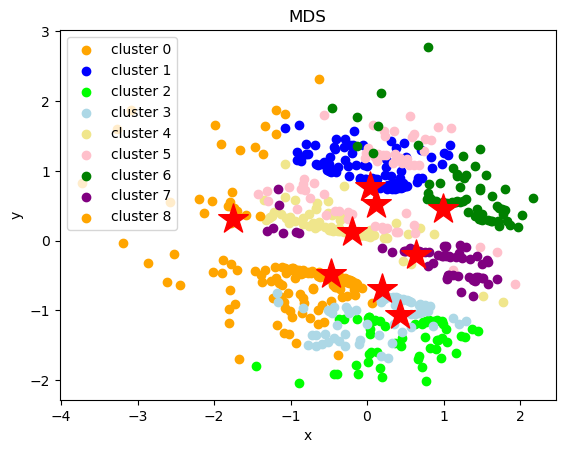

In [53]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [61]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

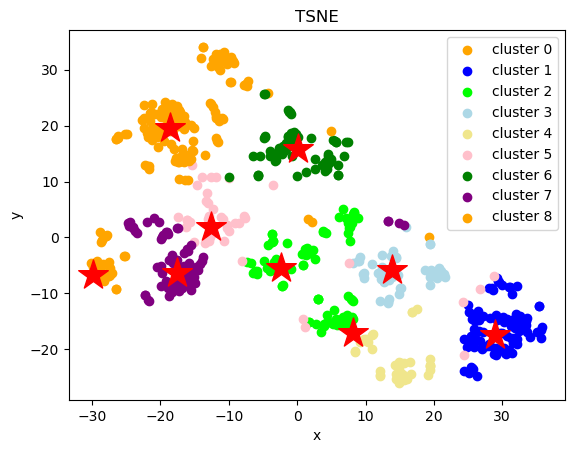

In [62]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [63]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [64]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  cluster  
0                    1              1     0.841086        6  
1                    0              0     0.871711        7  
2                    1              1     0.385189        8  
3                    1              1     0.717012        0  
4                    1              1     0.860305        6

In [65]:
df.tail()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
609    0.000000         0.666409    0.676143             0.750   
610    1.000000         0.858916    0.395858             0.375   
611    0.333333         1.313719    1.566110             0.750   
612    0.666667         1.267616    1.325676             0.750   
613    0.000000         0.925883    1.074155             0.750   

     Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
609               1            0           0            0            0   
610               1            1           0            1            0   
611               1            1           0            1            0   
612               1            1           0            1            0   
613               0            0           0            0            0   

     Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
609                  0                  0                       0   
610                  0                  0                       0   
611                  0                  0                       0   
612                  0                  0                       0   
613                  1                  0                       0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  TotalIncome  \
609                        0                    0              1     0.364708   
610                        0                    0              1     0.587496   
611                        0                    1              1     1.116075   
612                        0                    1              1     1.042256   
613                        1                    0              0     0.663523   

     cluster  
609        2  
610        7  
611        8  
612        8  
613        3

#### Compute the mean value of each attribute for each cluster

In [66]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.355191         0.784712    1.024003          0.674180   
1          0.322695         0.890963    1.114910          0.724734   
2          0.079710         0.880286    1.016960          0.756793   
3          0.132075         0.844344    0.983452          0.716981   
4          0.350000         0.712840    0.966122          0.701875   
5          0.373984         1.962210    1.722892          0.704268   
6          0.074627         0.797419    0.907086          0.712687   
7          0.273973         0.842642    1.080379          0.694863   
8          0.340502         0.876631    1.063716          0.706452   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.754098     0.950820    0.016393     0.983607     0.000000   
1              0.914894     1.000000    0.000000     1.000000     0.000000   
2              0.869565     0.793478    0.000000     0.000000     0.010870   
3              0.830189     0.000000    0.094340     0.320755     0.018868   
4              0.850000     0.900000    0.000000     0.725000     0.000000   
5              0.804878     0.780488    0.097561     0.780488     0.000000   
6              0.850746     0.597015    0.014925     0.000000     0.014925   
7              0.849315     0.931507    0.027397     1.000000     0.000000   
8              0.892473     0.946237    0.000000     1.000000     0.000000   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.131148           0.032787                1.000000   
1                 0.117021           0.031915                0.000000   
2                 0.086957           0.054348                0.184783   
3                 0.150943           0.075472                0.094340   
4                 0.125000           0.025000                1.000000   
5                 0.414634           0.048780                0.048780   
6                 0.089552           0.074627                0.134328   
7                 0.164384           0.054795                0.000000   
8                 0.075269           0.064516                0.000000   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.000000             0.491803       0.540984   
1                       1.000000             0.000000       0.819149   
2                       0.336957             0.000000       0.652174   
3                       1.000000             0.000000       0.735849   
4                       1.000000             0.000000       0.750000   
5                       0.365854             0.292683       0.634146   
6                       0.000000             1.000000       0.582090   
7                       0.000000             0.000000       0.671233   
8                       0.000000             1.000000       0.741935   

         TotalIncome  
cluster               
0           0.741979  
1           0.861888  
2           0.780220  
3           0.718076  
4           0.687443  
5           1.883531  
6           0.700921  
7           0.857507  
8           0.852585

#### Conclusion

By looking at the table above we can argue that:
* Cluster 2 represents the largest ApplicantIncome by some margin along with clearly largest loan amount. Also of note is the clearly largest proportion of self-employed. Intuitively, this all makes sense. <br/> 
* Cluster 4 with the lowest ApplicantIncome has a low loan amount(but not the lowest) has the second higest number of dependents and a credit history that is in line with other clusters. Noteworthy though is that it is predominately male and most striking is not graduate score which really sets it apart form other clusters.
* Cluster 6 has the fewest dependents, possibly older/retired.
It might have been possible to drop 'TotalIncome' as 'ApplicantIncome' might be considered as a proxy.
At k=8 we have reasonably  good separtaion of clusters. I tried it with just k=2 and saw a good separation on the scatterplot between the 2 clusters, but 2 clusters does not adequately express a dataset of this complexity.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._

# Footnote
I did some PCA to try to get a more reasonable k-value but didn't follow through on this as the elbow method was giving me a value of 2 which is too small to be useful I think

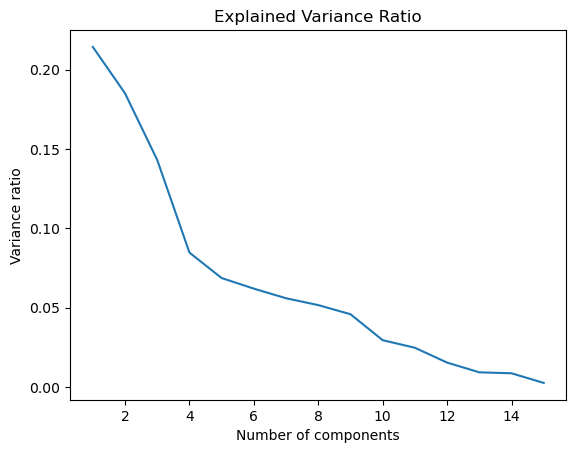

Optimal number of components: 11


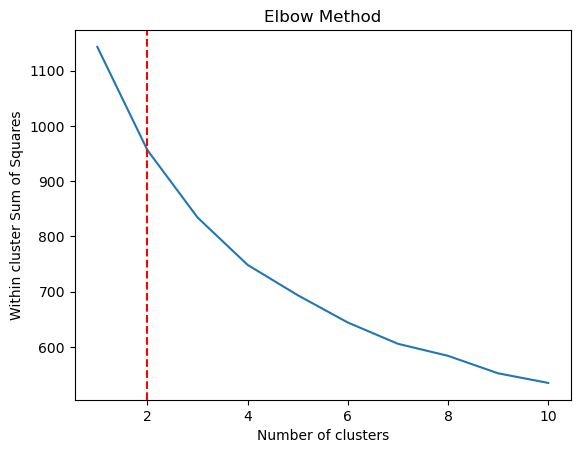

Optimal number of clusters: 2


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv("loans_train_prepared.csv")

# Using these columns for PCA
cols=['Dependents', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History', 'Gender_Male', 'Gender_nan', 'Married_Yes',
        'Married_nan', 'Self_Employed_Yes', 'Self_Employed_nan',
        'Education_Not Graduate', 'Property_Area_Semiurban',
        'Property_Area_Urban', 'TotalIncome']

# separate out target variable
X=df[cols]

# run PCA
pca = PCA()
pca.fit(X)

# plot explained variance ratio vs number of components
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('Number of components')
plt.ylabel('Variance ratio')
plt.show()

# identify optimum number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
opt_n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Optimum number of components:", opt_n_components)

# transform data to selected number of components
pca = PCA(n_components=opt_n_components)
X_pca = pca.fit_transform(X)

# perform clustering using elbow method
within_cluster_ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random')
    kmeans.fit(X_pca)
    within_cluster_ss.append(kmeans.inertia_)

# plot WCSS vs number of clusters
plt.plot(range(1, 11), within_cluster_ss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares')

# mark optimum value of k on chart
distances = []
for i in range(1, len(within_cluster_ss)):
    delta_wcss = within_cluster_ss[i-1] - within_cluster_ss[i]
    distances.append(delta_wcss)
elbow_index = np.argmax(distances)
opt_k = elbow_index + 2
plt.axvline(x=opt_k, linestyle='--', color='red')

plt.show()

print("Optimum number of clusters:", optimal_k)